In [164]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from peakfit import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
from scipy.special import erf

In [165]:
def gen_estimation(noise_level, param_name):
    x = np.linspace(-5, 5, 123)
    y = noise_level*np.random.randn(*x.shape)
    y += Gauss()(x, 0.0, 1, 1)

    results, fit = peakfit(x, y, Gauss())

    return results[0][param_name]

In [160]:
np.max(x0)

1.0164952328186232

In [180]:
param_name = 'fwhm'
noise_level = 0.08

p_estim = [gen_estimation(noise_level, param_name) for _ in range(50)]

std_p = np.std(p_estim)
print(f'std_{param_name}:', std_p)

std_fwhm: 0.03157189860465138


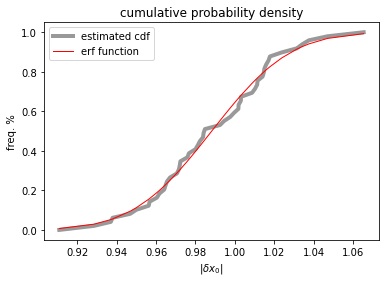

In [181]:
sorted_p = np.sort( p_estim )
percent = np.linspace(0, 1, len(p_estim))

p_normed = (sorted_p - np.mean(sorted_p))/(np.sqrt(2)*std_p)
cdf_theo = (1 + erf(p_normed))/2

plt.plot(sorted_p, percent, color='black',
         label='estimated cdf', linewidth=4, alpha=0.4);
plt.plot(sorted_p, cdf_theo, label='erf function',
         linewidth=1, color='r');
plt.title('cumulative probability density')
plt.xlabel('$|\delta x_0|$'); plt.ylabel('freq. %');
plt.legend();

http://people.duke.edu/~hpgavin/SystemID/CourseNotes/linear-least-squres.pdf

In [178]:
x = np.linspace(-5, 5, 123)
y = noise_level*np.random.randn(*x.shape)
y += Gauss()(x, 0.0, 1, 1)

results, fit = peakfit(x, y, Gauss())
results

[{'function': 'Gaussian',
  'x0': -0.003525863199289352,
  'x0_std': 0.021788430893998678,
  'fwhm': 1.1147649113168852,
  'fwhm_std': 0.05383996112376731,
  'amplitude': 0.913160896072934,
  'amplitude_std': 0.036899121674478175},
 {'function': 'Linear',
  'slope': 0.0023175777827027628,
  'slope_std': 0.0029458048516186543,
  'intercept': -0.007269508598206084,
  'intercept_std': 0.00985374484126963}]

## What about Poisson noise

In [193]:
#from scipy.stats import poisson
from numpy.random import poisson
#(*args, **kwds) = <scip

variance = sigma^2 = lmabda

In [197]:
x = np.linspace(-5, 5, 123)
y0 = 3 + Gauss()(x, 0.0, 1, 5)
#y += noise_level*np.random.randn(*x.shape)
y = y0 + poisson(y)

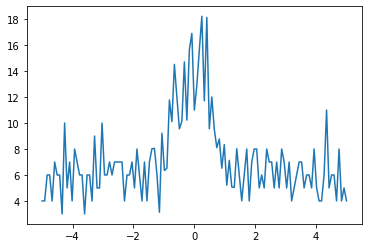

In [199]:
plt.plot(x, y);

In [200]:
results, fit = peakfit(x, y, Gauss(), background=None)
results

[{'function': 'Gaussian',
  'x0': -0.02797904489759633,
  'x0_std': 0.21459811876222665,
  'fwhm': 9.1406266669736,
  'fwhm_std': 0.7495365409324501,
  'amplitude': 9.18770438561484,
  'amplitude_std': 0.4036985336454118}]